# Table of Contents
 <p><div class="lev1"><a href="#Plot-individual-heatmaps"><span class="toc-item-num">1&nbsp;&nbsp;</span>Plot individual heatmaps</a></div><div class="lev1"><a href="#Plot-ratio-heatmaps"><span class="toc-item-num">2&nbsp;&nbsp;</span>Plot ratio heatmaps</a></div>

In [1]:
import os

import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

%matplotlib inline

import cooler
import bioframe


In [2]:
# add fall colormap

def listToColormap(colorList, cmapName=None):
    colorList = np.array(colorList)
    if colorList.min() < 0:
        raise ValueError("Colors should be 0 to 1, or 0 to 255")
    if colorList.max() > 1.:
        if colorList.max() > 255:
            raise ValueError("Colors should be 0 to 1 or 0 to 255")
        else:
            colorList = colorList / 255.
    return matplotlib.colors.LinearSegmentedColormap.from_list(cmapName, colorList, 256)

fallList = [
     (255, 255, 255), (255, 255, 204),
     (255, 237, 160), (254, 217, 118),
     (254, 178, 76), (253, 141, 60),
     (252, 78, 42), (227, 26, 28),
     (189, 0, 38), (128, 0, 38), (0, 0, 0)]


def registerList(mylist, name):
    mymap = listToColormap(mylist, name)
    mymapR = listToColormap(mylist[::-1], name + "_r")
    mymapR.set_bad('white',1.)
    mymap.set_bad('white',1.)
    matplotlib.cm.register_cmap(name, mymap)
    matplotlib.cm.register_cmap(name + "_r", mymapR)

registerList(fallList, "fall")

coolwarm = matplotlib.cm.coolwarm
coolwarm.set_bad('white',1.)
matplotlib.cm.register_cmap('coolwarm', coolwarm)

In [3]:
# define and make the folder to store generated images

FIG_FOLDER = '/net/levsha/share/lab/DrosophilaWulab/doc/2017-10-30-jj-figs/'
os.makedirs(FIG_FOLDER, exist_ok=True)

# Plot individual heatmaps

In [4]:
# select which cooler to plot and the genomic range along the x- and y-axis

COOLER_PATH = '/net/levsha/share/lab/DrosophilaWulab/coolers/JJ25_26.wo3kbCisTransHom.10000.cool'
REGION_X = 'chr2L_057:0-10,000,000'
REGION_Y = 'chr2L_057:0-10,000,000'

# pick the figure name that will be used to save the figure
FIGURE_NAME = 'test'

In [5]:
clr = cooler.Cooler(COOLER_PATH)
mat = clr.matrix(balance=True).fetch(REGION_Y, REGION_X)

parsed_region_x = bioframe.parse_region_string(REGION_X)
parsed_region_y = bioframe.parse_region_string(REGION_Y)

/home/golobor/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


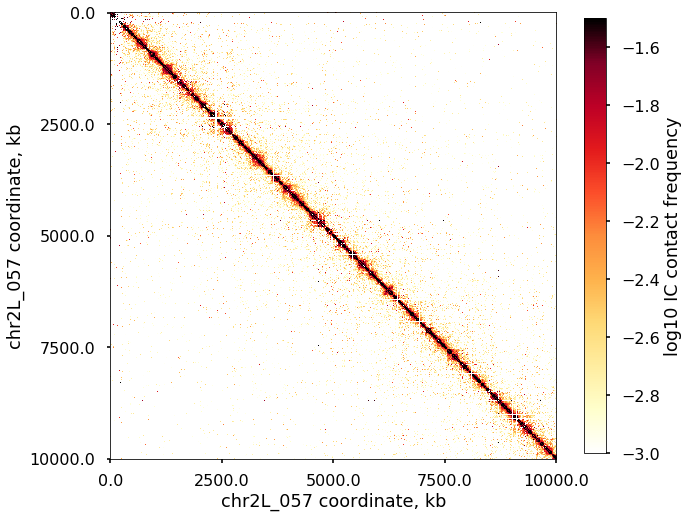

In [6]:
# make a 10x10 inches figure
plt.figure(figsize=(10,10))

# plot the log10 of the matrix, with the color scale between -3.0 and -1.5
plt.imshow(
    np.log10(mat),
    vmin = -3.0,
    vmax = -1.5,
    cmap='fall'
)

# add a colorbar on a side
plt.colorbar(
    label='log10 IC contact frequency',
    shrink=0.8 # use this argument to adjust the relative size of the colorbar
)

plt.xticks(
    np.linspace(0, mat.shape[1], 5),
    np.linspace(parsed_region_x[1], parsed_region_x[2], 5) / 1e3
)
plt.xlabel('{} coordinate, kb'.format(parsed_region_x[0]))

plt.yticks(
    np.linspace(0, mat.shape[0], 5),
    np.linspace(parsed_region_y[1], parsed_region_y[2], 5) / 1e3
)
plt.ylabel('{} coordinate, kb'.format(parsed_region_y[0]))


# save figure as a png and a pdf.
for fmt in ['png', 'pdf']:
    plt.savefig(FIG_FOLDER+'/{}.{}'.format(FIGURE_NAME, fmt),
                bbox_inches='tight',
                dpi=300)

# Plot ratio heatmaps

In [7]:
COOLER_PATH_1 = '/net/levsha/share/lab/DrosophilaWulab/coolers/JJ25_26.wo3kbCisTransHom.10000.cool'
REGION_X_1 = 'chr2L_057:0-10,000,000'
REGION_Y_1 = 'chr2L_057:0-10,000,000'

COOLER_PATH_2 = '/net/levsha/share/lab/DrosophilaWulab/coolers/JJ25_26.wo3kbCisTransHom.10000.cool'
REGION_X_2 = 'chr2L_439:0-10,000,000'
REGION_Y_2 = 'chr2L_439:0-10,000,000'

FIGURE_NAME = 'test_ratio'

In [8]:
clr_1 = cooler.Cooler(COOLER_PATH_1)
mat_1 = clr.matrix(balance=True).fetch(REGION_Y_1, REGION_X_1)

parsed_region_x_1 = bioframe.parse_region_string(REGION_X_1)
parsed_region_y_1 = bioframe.parse_region_string(REGION_Y_1)

clr_2 = cooler.Cooler(COOLER_PATH_2)
mat_2 = clr.matrix(balance=True).fetch(REGION_Y_2, REGION_X_2)

parsed_region_x_2 = bioframe.parse_region_string(REGION_X_2)
parsed_region_y_2 = bioframe.parse_region_string(REGION_Y_2)

/home/golobor/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/home/golobor/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/home/golobor/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


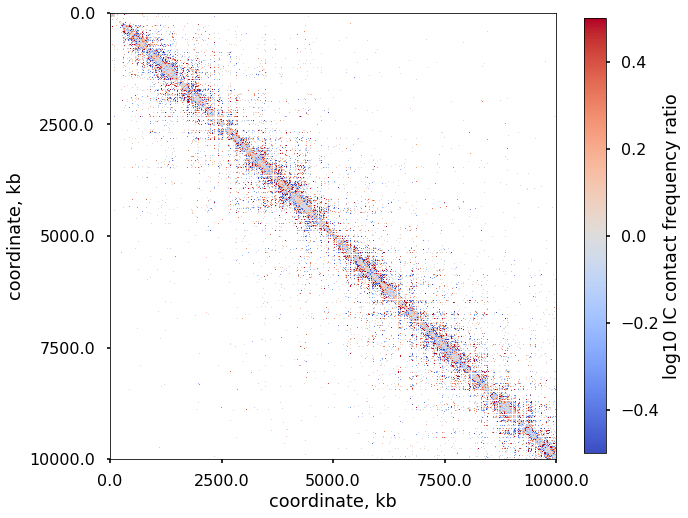

In [9]:
plt.figure(figsize=(10,10))
plt.imshow(
    np.log10(mat_2 / mat_1),
    vmin = 0.5,
    vmax = -0.5,
    cmap='coolwarm'
)
plt.colorbar(
    label='log10 IC contact frequency ratio',
    shrink=0.8)

plt.xticks(
    np.linspace(0, mat_1.shape[1], 5),
    np.linspace(parsed_region_x_1[1], parsed_region_x_1[2], 5) / 1e3
)
plt.xlabel('coordinate, kb'.format(parsed_region_x_1 [0]))

plt.yticks(
    np.linspace(0, mat_1.shape[0], 5),
    np.linspace(parsed_region_y_1[1], parsed_region_y_1[2], 5) / 1e3
)
plt.ylabel('coordinate, kb'.format(parsed_region_y_1[0]))


for fmt in ['png', 'pdf']:
    plt.savefig(FIG_FOLDER+'/{}.{}'.format(FIGURE_NAME, fmt),
                bbox_inches='tight',
                dpi=300)